# Unsupervised Learning Analysis for Microsoft 

>**Team 10 - Cohort 3 (Castro)**<br>
>**Machine Learning** <br>
>**Professor:** Chase Kusterer <br>

>**Team members:** <br>
Georgina Canela Ferre<br>
Hao Yang, Su <br>
Luciana Brochmann<br>
Madhu Raveendran <br>
Sheethal Melnarse<br>
Thuan Tran<br>             

# Overview of the Case

**Windows or Mac?**

That's the question many customer have at the time of purchasing a new computer. 
In the below analysis we are going to elaborate an unsupervised learning for Microsoft with data of 388 students from Hult International Business School. 

The students have been asked for the following:

1. 50 questions related to Big Five personality traits<br>
2. 20 questions related to Hult DNA<br>
3. Questions related to demographics such as age, gender and nationality.<br>

The goal is to differentiate the personality traits that make a student to purchase a Macbook or a Windows PC by clustering the students against the following question:

**What laptop would you buy in next assuming if all laptops cost the same?**


**Data:**<br>
Including its demographics, are representative of the population Microsoft is attempting to study.

# Import data and packages

Importing all necessary packages for the analysis.

In [48]:
#####################
# importing packages#
#####################

import pandas                as pd                        # data science essentials
import matplotlib.pyplot     as plt                       # fundamental data visualization
import seaborn               as sns                       # enhanced visualization
from sklearn.decomposition   import PCA                   # pca
from sklearn.preprocessing   import StandardScaler        # standard scaler
from scipy.cluster.hierarchy import dendrogram, linkage   # dendrograms
from sklearn.cluster         import KMeans                # k-means clustering

Importing the survey data from excel file.

In [49]:
###########################################
# loading data and setting display options#
###########################################

file = "Survey_Data_Final_Exam.xlsx"
df_survey = pd.read_excel(file)

# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In this section we are going to declare 2 functions that will be used during the analysis.<br> 
The functions are: **inertia_plot** and **screen_plot**

In [50]:
# Inertia Plot def function #

def inertia_plot(data, max_clust = 10):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        
        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


# Scree plot def function #
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_survey_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Preparing the data

***
In this section we are going to prepare the data for the Principal Component Analysis. 
First of all, we are going to clean the data by replacing the words 'MAC' to 'Macbook' it will make visuals of the plot more consistent since we will have all the Apple customers in one group.

Secondly, we are going to correct the typos under the questions 'What is your nationality?' to subset by nationality and make sure we won't miss data due to the typos. 
 
Last but not least, we are going to remove the students who reported to be enrolled in the Disruptive Innovation Master and also the students which didn't want to report their nationality because we understood that the survey was just done by MSBA students so we wanted to make sure to only have behaviors traits from MSBA cohorts. 
***

In [51]:
df_survey = df_survey.replace('MAC','Macbook')

In [52]:
nationality = df_survey['What is your nationality? ']

nationality[0, 1, 148, 149]              = 'Ecuadorian'
nationality[4, 14, 20, 21, 30, 201, 
            53, 373, 378,  376, 360, 
            356, 370, 266, 245, 327, 230, 228,
            80, 178, 168, 169, 82,
            162, 97, 386, 383,  146,
            118, 152,294, 295, 310, 311] = 'Chinese'
nationality[9, 157, 347, 369]            = 'Japanese'
nationality[13, 126, 129, 147, 
            161, 274, 277]               = 'American'
nationality[19, 167]                     = 'Filipino'
nationality[22, 170]                     = 'Indonesian'
nationality[33, 35, 98, 127, 181, 
            183, 246, 275, 354]          = 'South Korean'
nationality[36, 92, 184, 240]            = 'German'
nationality[43, 191]                     = 'Czech'
nationality[44, 192]                     = 'Peruvian'
nationality[50, 116, 198, 264]           = 'Brazilian'
nationality[56, 204, 342]                = 'Mexican'
nationality[60, 85, 208, 233, 351]       = 'Italian'
nationality[63, 211]                     = 'Mauritian'
nationality[66, 78, 214, 226, 330]       = 'Colombian'
nationality[67, 79, 105, 140, 215, 227,
            253, 326, 372]               = 'Taiwanese'
nationality[68, 216, 359]                = 'British'
nationality[70, 218]                     = 'Belarusian'
nationality[75, 95, 117, 151, 223, 243, 
            265, 313, 315, 348, 352, 
            361, 371, 380, 389, 390]     = 'Indian'
nationality[86, 124, 133, 234, 272, 281] = 'Nigerian'
nationality[103, 251]                    = 'Panamanian'
nationality[110, 258, 338]               = 'Spanish'
nationality[111, 141, 259, 289]          = 'Russian'
nationality[113, 145, 261, 293]          = 'Canadian'
nationality[142, 290]                    = 'Congolese'
nationality[341]                         = 'Venezuelan'
nationality[343]                         = 'Costarrican'
nationality[344]                         = 'Salvadorans'
nationality[345]                         = 'Malaysian'
nationality[353]                         = 'Iranian'
nationality[355]                         = 'Thai'
nationality[364]                         = 'Armenian'
nationality[368]                         = 'Polish'
nationality[381]                         = 'French'
nationality[385]                         = 'Dominican'

C:\Users\SHEETHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SHEETHAL\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\SHEETHAL\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [53]:
df_survey.drop(df_survey[df_survey['What program are you in?'] == 'DD (MBA & Disruptive innovation)'].index, inplace=True)
df_survey.drop(df_survey[df_survey['What is your nationality? '] == 'calm'].index, inplace=True)
df_survey.drop(df_survey[df_survey['What is your nationality? '] == '.'].index, inplace=True)
df_survey.drop(df_survey[df_survey['What is your nationality? '] == 'Hispanic'].index, inplace=True)

df_survey.reset_index(drop=True, inplace=True)

# Principal Component Analysis

***
Before proceeding to carry out PCA, in order to facilitate the analysis based on Big 5 and Hult DNA, we have separated the dataset into 2 sets and also removed the demographics in order not to let it bias the results of our analysis. We don't want to mix the metrics that's why we decided to split the data.  Also, we have realized that few of the questions in both the Big 5 and Hult DNA dataset are reversed in nature hence we have those scores inverted to have all the scores to all the questions lie in same scale.

***

In [54]:
#Creating the 5 big personality trails dataframe by dropping the unnecesary columns
df_big5 = df_survey.drop([  'surveyID',
                            'See underlying patterns in complex situations',
                            'Don\'t  generate ideas that are new and different',
                            'Demonstrate an awareness of personal strengths and limitations',
                            'Display a growth mindset',
                            'Respond effectively to multiple priorities',
                            'Take initiative even when circumstances, objectives, or rules aren\'t clear',
                            'Encourage direct and open discussions',
                            'Respond effectively to multiple priorities.1',
                            'Take initiative even when circumstances, objectives, or rules aren\'t clear.1',
                            'Encourage direct and open discussions.1',
                            'Listen carefully to others',
                            'Don\'t persuasively sell a vision or idea',
                            'Build cooperative relationships',
                            'Work well with people from diverse cultural backgrounds',
                            'Effectively negotiate interests, resources, and roles',
                            'Can\'t rally people on the team around a common goal',
                            'Translate ideas into plans that are organized and realistic',
                            'Resolve conflicts constructively',
                            'Seek and use feedback from teammates',
                            'Coach teammates for performance and growth',
                            'Drive for results',
                            'What laptop do you currently have?',
                            'What laptop would you buy in next assuming if all laptops cost the same?',
                            'What program are you in?',
                            'What is your age?',
                            'Gender',
                            'What is your nationality? ',
                            'What is your ethnicity?'], axis=1)

While creating the df for HULT DNA we realize that 3 questions were repeated in order to have a clean DataFrame without duplicates.

In [55]:
#Creating the Hult DNA dataframe by dropping the unnecesary columns
df_hult_dna = df_survey.drop([  'surveyID',
                                'Am the life of the party',
                                'Feel little concern for others',
                                'Am always prepared',
                                'Get stressed out easily',
                                'Have a rich vocabulary',
                                'Don\'t talk a lot',
                                'Am interested in people',
                                'Leave my belongings around',
                                'Am relaxed most of the time',
                                'Have difficulty understanding abstract ideas',
                                'Feel comfortable around people',
                                'Insult people',
                                'Pay attention to details',
                                'Worry about things',
                                'Have a vivid imagination',
                                'Keep in the background',
                                'Sympathize with others\' feelings',
                                'Make a mess of things',
                                'Seldom feel blue',
                                'Am not interested in abstract ideas',
                                'Start conversations',
                                'Am not interested in other people\'s problems',
                                'Get chores done right away',
                                'Am easily disturbed',
                                'Have excellent ideas',
                                'Have little to say',
                                'Have a soft heart',
                                'Often forget to put things back in their proper place',
                                'Get upset easily',
                                'Do not have a good imagination',
                                'Talk to a lot of different people at parties',
                                'Am not really interested in others',
                                'Like order',
                                'Change my mood a lot',
                                'Am quick to understand things',
                                'Don\'t like to draw attention to myself',
                                'Take time out for others',
                                'Shirk my duties',
                                'Have frequent mood swings',
                                'Use difficult words',
                                'Don\'t mind being the center of attention',
                                'Feel others\' emotions',
                                'Follow a schedule',
                                'Get irritated easily',
                                'Spend time reflecting on things',
                                'Am quiet around strangers',
                                'Make people feel at ease',
                                'Am exacting in my work',
                                'Often feel blue',
                                'Am full of ideas',
                                'What laptop do you currently have?',
                                'What laptop would you buy in next assuming if all laptops cost the same?',
                                'What program are you in?',
                                'What is your age?',
                                'Gender',
                                'What is your nationality? ',
                                'What is your ethnicity?',
                                'Respond effectively to multiple priorities.1',
                                'Take initiative even when circumstances, objectives, or rules aren\'t clear.1',
                                'Encourage direct and open discussions.1'], axis=1)

As mentioned, below listed questions had the scaling reversed. We decided to align the scale with the rest of questions asked in the survey. 

In [56]:
#Inverting the scale values for those variables showing reverse scale in the personality test
big5_inverted = ['Feel little concern for others',
                'Get stressed out easily',
                'Don\'t talk a lot',
                'Leave my belongings around',
                'Have difficulty understanding abstract ideas',
                'Insult people',
                'Worry about things',
                'Keep in the background',
                'Make a mess of things',
                'Seldom feel blue',
                'Am not interested in abstract ideas',
                'Am not interested in other people\'s problems',
                'Am easily disturbed',
                'Have little to say',
                'Often forget to put things back in their proper place',
                'Get upset easily',
                'Do not have a good imagination',
                'Am not really interested in others',
                'Change my mood a lot',
                'Don\'t like to draw attention to myself',
                'Shirk my duties',
                'Have frequent mood swings',
                'Get irritated easily',
                'Am quiet around strangers',
                'Often feel blue']

big5_behavior = df_big5.copy()
for col in big5_inverted:
    for i, cols in big5_behavior.iterrows():
        if big5_behavior.loc[i,col] == 1:
            big5_behavior.loc[i,col] = 5
        elif big5_behavior.loc[i,col] == 2:
            big5_behavior.loc[i,col] = 4
        elif big5_behavior.loc[i,col] == 4:
            big5_behavior.loc[i,col] = 2
        elif big5_behavior.loc[i,col] == 5:
            big5_behavior.loc[i,col] = 1

In [57]:
#Inverting the scale values for those variables showing reverse scale in the Hult DNA
hult_dna_inverted = ['Don\'t  generate ideas that are new and different',
                     'Don\'t persuasively sell a vision or idea',
                     'Can\'t rally people on the team around a common goal']

hult_dna_behavior = df_hult_dna.copy()
for col in hult_dna_inverted:
    for i, cols in hult_dna_behavior.iterrows():
        if hult_dna_behavior.loc[i,col] == 1:
            hult_dna_behavior.loc[i,col] = 5
        elif hult_dna_behavior.loc[i,col] == 2:
            hult_dna_behavior.loc[i,col] = 4
        elif hult_dna_behavior.loc[i,col] == 4:
            hult_dna_behavior.loc[i,col] = 2
        elif hult_dna_behavior.loc[i,col] == 5:
            hult_dna_behavior.loc[i,col] = 1

# Big five personality trails

***
To infer effective insights from the analysis we have grouped the pertinent survey questions into Big 5 personality traits based on external documentation: <a href = "https://openpsychometrics.org/printable/big-five-personality-test.pdf" > click here </a>

After reading and learning about each category, below we divided each question into 5 different traits: **Extraversion, Agreeableness, Conscientiousness, Neuroticism and Openness**.
***

In [58]:
#add after
extraversion_index = [0,5,10,15,20,25,30,35,40,45]
big5_behavior['Extraversion'] = 0
for i in extraversion_index:
    big5_behavior['Extraversion'] = big5_behavior['Extraversion'] + big5_behavior.iloc[:,i]

agreeableness_index = [1,6,11,16,21,26,31,36,41,46]
big5_behavior['Agreeableness'] = 0
for i in agreeableness_index:
    big5_behavior['Agreeableness'] = big5_behavior['Agreeableness'] + big5_behavior.iloc[:,i]

conscientiousness_index = [2,7,12,17,22,27,32,37,42,47]
big5_behavior['Conscientiousness'] = 0
for i in conscientiousness_index:
    big5_behavior['Conscientiousness'] = big5_behavior['Conscientiousness'] + big5_behavior.iloc[:,i]
    
neuroticism_index = [3,8,13,18,23,28,33,38,43,48]
big5_behavior['Neuroticism'] = 0
for i in neuroticism_index:
    big5_behavior['Neuroticism'] = big5_behavior['Neuroticism'] + big5_behavior.iloc[:,i]
    
openness_index = [4,9,14,19,24,29,34,39,44,49]
big5_behavior['Openness'] = 0
for i in openness_index:
    big5_behavior['Openness'] = big5_behavior['Openness'] + big5_behavior.iloc[:,i]

# Creating new column name #
big5_behavior = big5_behavior[['Extraversion',
                               'Agreeableness',
                               'Conscientiousness',
                               'Neuroticism',
                               'Openness']]

***

Next, we found that responses to Big 5 have higher variances hence we carried out standardization by fitting and transforming them using StandardScaler().

***

In [59]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(big5_behavior)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(big5_behavior)


# converting scaled data into a DataFrame
big5_scaled = pd.DataFrame(X_scaled)


# reattaching column names
big5_scaled.columns = big5_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(big5_behavior),'\n\n')
print(pd.np.var(big5_scaled))

Extraversion         45.316798
Agreeableness        30.722732
Conscientiousness    30.880009
Neuroticism          45.568445
Openness             27.802071
dtype: float64 


Extraversion         1.0
Agreeableness        1.0
Conscientiousness    1.0
Neuroticism          1.0
Openness             1.0
dtype: float64


***
First, we will fit and transform a Principal component analysis model with no limits to its principal components to determine each components' explained variance ratio.  Upon on visualizing the related scree plot we realized that with only 3 principal components we are able to explain 70% of the variances.
***

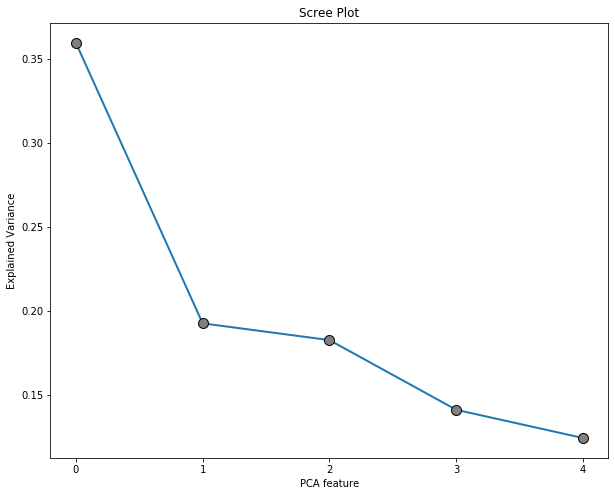

In [60]:
# Instantiating PCA object with no limit to principal components #
pca = PCA(n_components = None,
          random_state = 222)


# fitting and transforming the scaled data #
big5_pca = pca.fit_transform(big5_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

Choosing more than 70% of the data by selecting 3 components.

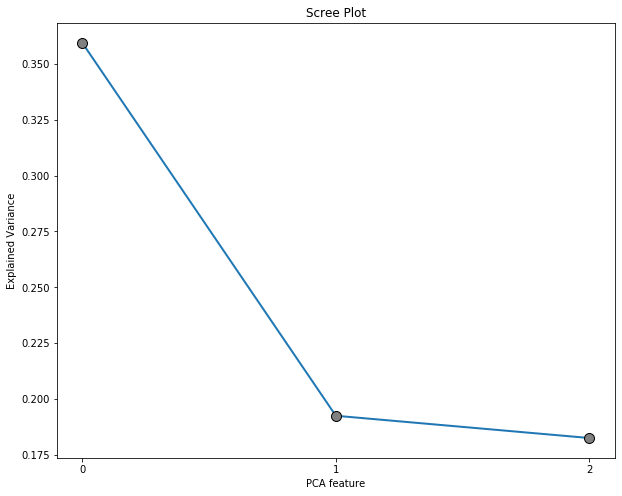

In [61]:
# Instantiating a new model using the 3 principal components #
pca_3 = PCA(n_components = 3,
            random_state = 222)


# fitting and transforming the scaled data #
big5_pca_3 = pca_3.fit_transform(big5_scaled)

# Plotting the scree plot with 3 components #
scree_plot(pca_object = pca_3)

Below we are comparing the variance of the PCA model with **none** component and PCA model with **3 components**

In [62]:
### Unlimited component PCA model ###

# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(big5_scaled.columns)


### 3 component PCA model ###

# transposing pca components (pc = 3)
factor_loadings_3 = pd.DataFrame(pd.np.transpose(pca_3.components_))


# naming rows as original features
factor_loadings_3 = factor_loadings_3.set_index(big5_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


3 Components Factor Loadings
------------------------------
{factor_loadings_3.round(2)}
""")



MAX Components Factor Loadings
------------------------------
                      0     1     2     3     4
Extraversion      -0.40  0.38 -0.70 -0.09  0.44
Agreeableness     -0.52  0.24  0.09  0.72 -0.38
Conscientiousness -0.48 -0.34  0.48  0.05  0.65
Neuroticism       -0.31 -0.78 -0.43 -0.08 -0.32
Openness          -0.50  0.27  0.28 -0.68 -0.38


3 Components Factor Loadings
------------------------------
                      0     1     2
Extraversion      -0.40  0.38 -0.70
Agreeableness     -0.52  0.24  0.09
Conscientiousness -0.48 -0.34  0.48
Neuroticism       -0.31 -0.78 -0.43
Openness          -0.50  0.27  0.28



***
Here, we have labeled the factor loadings.  Label 0 is named as 'Unpleasant' as this cluster have negative values for all the big 5 traits.  Similarly, Label 1 is changed to 'Socialite' since the cluster is more extroverted and empathetic.  Likewise, we labeled 2 as 'Wary' as they are highly diligent and open to variety of experiences.
***

In [63]:
# Naming the factor loadings #

factor_loadings_3.columns = ['Unpleasant',
                             'Socialite',
                             'Wary']

In [64]:
# analyzing factor strengths per customer
X_pca_reduced = pca_3.transform(big5_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)

# Naming the columns #
X_pca_df.columns = ['Unpleasant',
                    'Socialite',
                    'Wary']
# checking the results
X_pca_df

,Unpleasant,Socialite,Wary
0,-0.095896,-0.540842,0.121421
1,0.426738,0.035882,1.160329
2,0.792697,-1.426047,-0.980700
3,0.111588,0.702806,0.183305
4,1.864462,1.094820,0.341600
5,1.187941,1.133401,0.361057
6,3.012222,-0.660874,-2.420321
7,-1.271792,-0.378827,-0.911984
8,0.928540,-0.886426,0.156725
9,-1.803883,-1.044045,0.545596


# Hult DNA

***
Dataset which contains only questions related to Hult DNA were again combined together based on the DNA traits found using external research: <a href = "https://www.hult.edu/blog/why-every-leader-needs-growth-mindset/" > click here </a>
We were able to identify base on the external research the following 3 behavior traits: **Thinking, Communicating and Team Building**.

In [65]:
thinking_index = [0,1,2,3,4,17]
hult_dna_behavior['Thinking'] = 0
for i in thinking_index:
    hult_dna_behavior['Thinking'] = hult_dna_behavior['Thinking'] + hult_dna_behavior.iloc[:,i]

communicating_index = [6,7,8,11,13,15]
hult_dna_behavior['Communicating'] = 0
for i in communicating_index:
    hult_dna_behavior['Communicating'] = hult_dna_behavior['Communicating'] + hult_dna_behavior.iloc[:,i]

team_building_index = [5,9,10,12,14,16]
hult_dna_behavior['Team_building'] = 0
for i in team_building_index:
    hult_dna_behavior['Team_building'] = hult_dna_behavior['Team_building'] + hult_dna_behavior.iloc[:,i]
    

# Creating new column name #
hult_dna_behavior = hult_dna_behavior[['Thinking',
                                       'Communicating',
                                       'Team_building']]

Below we have standardized the data as they are highly variant.

In [66]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(hult_dna_behavior)


# TRANSFORMING our data after fit
hult_dna_scaled = scaler.transform(hult_dna_behavior)


# converting scaled data into a DataFrame
hult_dna_scaled = pd.DataFrame(hult_dna_scaled)


# adding column names
hult_dna_scaled.columns = hult_dna_behavior.columns


# checking pre- and post-scaling variance
print(pd.np.var(hult_dna_behavior), '\n\n')
print(pd.np.var(hult_dna_scaled))

Thinking         9.341289
Communicating    8.115760
Team_building    9.873173
dtype: float64 


Thinking         1.0
Communicating    1.0
Team_building    1.0
dtype: float64


Here, we have chosen the 2 ideal number of components since they explain more than 80% the data.

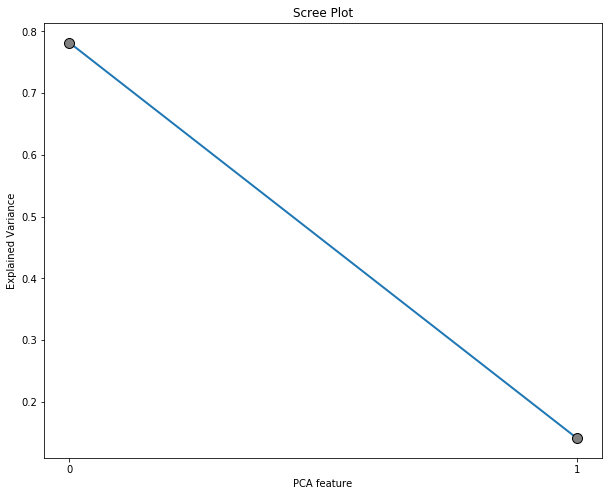

In [67]:
# Instantiating a new model using the 2 principal components #
hult_2 = PCA(n_components = 2,
            random_state = 222)


# fitting and transforming the scaled data #
hult_dna_2 = hult_2.fit_transform(hult_dna_scaled)

# Plotting the scree plot with 2 components #
scree_plot(pca_object = hult_2)

In [68]:
### 2 component PCA model ###

# transposing pca components (pc = 2)
factor_loadings_2 = pd.DataFrame(pd.np.transpose(hult_2.components_))


# naming rows as original features
factor_loadings_2 = factor_loadings_2.set_index(hult_dna_scaled.columns)

# checking the results
print(f"""
2 Components Factor Loadings
------------------------------
{factor_loadings_2.round(2)}
""")



2 Components Factor Loadings
------------------------------
                  0     1
Thinking      -0.55  0.81
Communicating -0.60 -0.22
Team_building -0.58 -0.54



Again, we choose to name the 0 factor loading as 'Undeveloped' as they have not well developed any of the 3 traits and 1 is labeled as 'Geek' as they concentrate mostly the 'thinking' trait.

In [69]:
# Rename each PCA

# naming each principal component
factor_loadings_2.columns = ['Undeveloped',
                             'Geek']


# checking the result
factor_loadings_2

,Undeveloped,Geek
Thinking,-0.551178,0.810748
Communicating,-0.599414,-0.220326
Team_building,-0.580436,-0.542350


Change to a dataframe

In [70]:
# analyzing factor strengths per customer
X_hult_reduced = hult_2.transform(hult_dna_scaled)


# converting to a DataFrame
X_hult_df = pd.DataFrame(X_hult_reduced)

# Naming the columns #
X_hult_df.columns = ['Undeveloped',
                     'Geek']
# checking the results
X_hult_df

,Undeveloped,Geek
0,-0.060778,-0.064304
1,-0.301256,-0.484250
2,1.288050,1.391267
3,-0.851045,-0.564191
4,1.489685,0.592865
5,-0.502890,0.314152
6,-1.430903,-0.986739
7,-0.455912,-0.314247
8,0.484623,-0.422233
9,-1.568012,0.934746


In [71]:
# concatenating X_pca_df with X_hult_df
clt_pca_df = pd.concat([X_pca_df,
                        X_hult_df],
                        axis = 1)

In [72]:
# Check the variance
pd.np.var(clt_pca_df)

Unpleasant     1.797421
Socialite      0.962684
Wary           0.912839
Undeveloped    2.344996
Geek           0.423860
dtype: float64

In [73]:
# Because is not 1, we are scaling the data
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(clt_pca_df)


# TRANSFORMING our data after fit
clt_pca_scaled = scaler.transform(clt_pca_df)


# converting scaled data into a DataFrame
clt_pca_scaled_df = pd.DataFrame(clt_pca_scaled)


# reattaching column names
clt_pca_scaled_df.columns = clt_pca_df.columns

# checking pre- and post-scaling variance
print(pd.np.var(clt_pca_df), '\n\n')
print(pd.np.var(clt_pca_scaled_df))

Unpleasant     1.797421
Socialite      0.962684
Wary           0.912839
Undeveloped    2.344996
Geek           0.423860
dtype: float64 


Unpleasant     1.0
Socialite      1.0
Wary           1.0
Undeveloped    1.0
Geek           1.0
dtype: float64


# Clustering

***
Using the defined function earlier, we plot the inertia plot to see the distribution clusters against inertia. The distance between two points represents the separation.

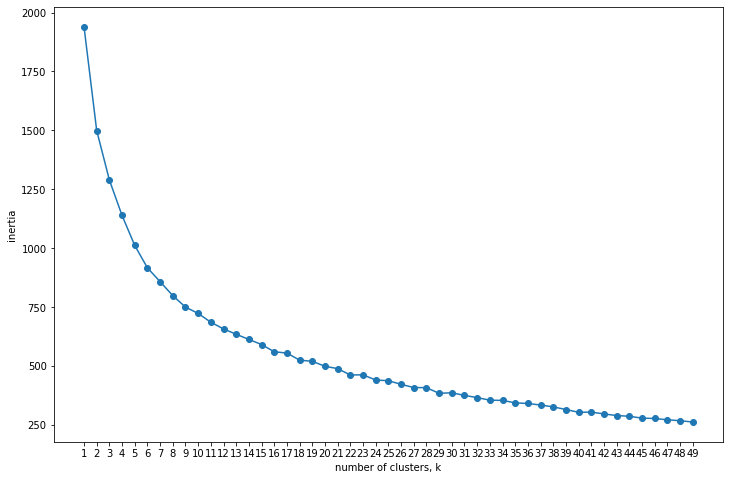

In [74]:
# calling the function with inertia_plot()
inertia_plot(data = clt_pca_scaled_df, max_clust = 50)

***
Here, we can plot the dendrogram to see the clustering. It helps us to see the distance between two points clearly so that we can make better decision in choosing the right number of clusters.

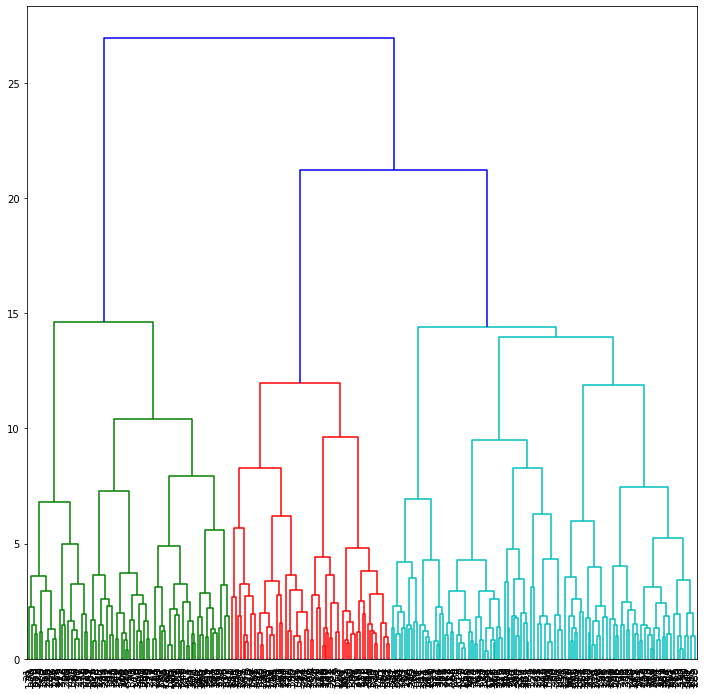

In [75]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = clt_pca_scaled_df,
                                 method = 'ward')


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 11)


# saving and displaying the plot
plt.savefig('standard_hierarchical_clust_ward.png')
plt.show()

***
Using K-means, we instantiate, fit and convert the clusters into a dataframe. Choosing cluster is very subjective, it depends on the size of the company, financial budget etc. Lower the number of clusters, more generalized the clusters are and higher the number of clusters, differentiation gets very specific. In this case, we are choosing number of clusters to be 4 because it seemed the sweet spot. The difference between 4 & 5 clusters and 6 & 7 clusters is very low. We are choosing 4 instead of 6 because the smallest cluster has around 21% of observations which is significant and worth looking into.

In [76]:
# INSTANTIATING a k-Means object with 6 clusters
clt_k_pca = KMeans(n_clusters = 4,
                   random_state = 222)


# fitting the object to the data
clt_k_pca.fit(clt_pca_scaled)


# converting the clusters to a DataFrame
clt_kmeans_pca = pd.DataFrame({'Cluster': clt_k_pca.labels_})


# checking the results
print(clt_kmeans_pca.iloc[: , 0].value_counts())

1    116
3    105
2     85
0     82
Name: Cluster, dtype: int64


In [77]:
# storing cluster centers
center_pca = clt_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
center_pca_df = pd.DataFrame(center_pca)


# renaming principal components
center_pca_df.columns = ['Unpleasant',
                         'Socialite',
                         'Wary',
                         'Undeveloped',
                         'Geek']
   
# checking results (clusters = rows, pc = columns)
center_pca_df.round(2)

,Unpleasant,Socialite,Wary,Undeveloped,Geek
0,0.46,1.22,0.41,0.04,-0.07
1,-0.12,-0.57,0.59,-0.04,0.74
2,1.01,-0.50,-0.47,1.10,-0.68
3,-1.04,0.09,-0.58,-0.88,-0.21


***
Combining K-means and principal component analysis into single dataframe. Also, filtering out the original dataset to get demographic information which will be concatenated later along with "surveyID". We can rename the clusters so that it's easy to read and interpret.

In [78]:
# Concatenating cluster with principal components
out_categorical = pd.concat([clt_kmeans_pca,
                             clt_pca_scaled_df],
                             axis = 1)

In [79]:
cat_df = df_survey.loc[:,"What laptop do you currently have?":]

In [80]:
last_df = pd.concat([df_survey['surveyID'],out_categorical, cat_df],axis = 1)

# renaming regions
cl_names = {0 : 'Cluster 1',
            1 : 'Cluster 2',
            2 : 'Cluster 3',
            3 : 'Cluster 4'}


last_df['Cluster'].replace(cl_names, inplace = True)

num_df = last_df


***
Let's save the newly created dataframe to Excel.

In [81]:
# saving the data to Excel
num_df.to_excel('Final Data.xlsx')

***
Below, we are trying to find what are the characteristics, traits and skill-set of a customer who wants to buy Microsoft laptops in the future. It would gives a better understanding of the future customers and make necessary improvements to attract more customers from competitors.
It will help not only in development of new products based of the customer's behavior but also help market the products to right audience thus saving a lot in marketing cost.

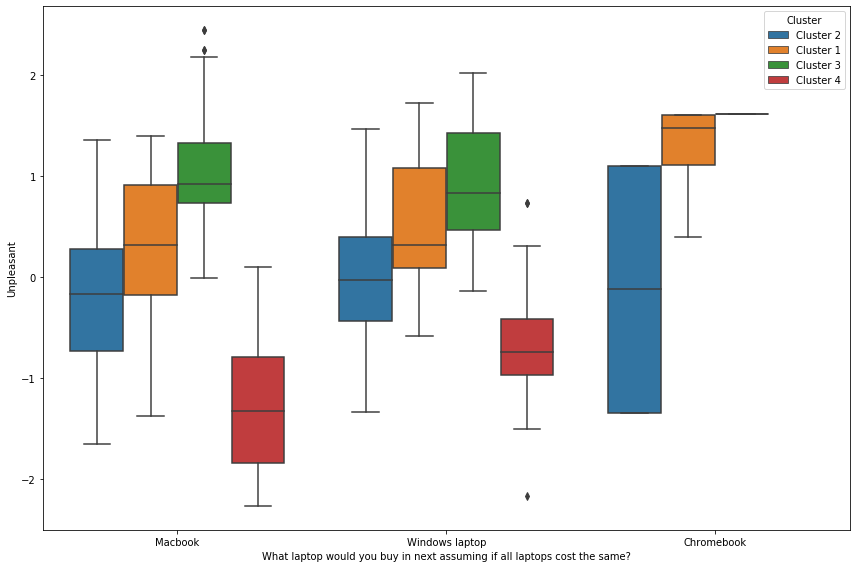

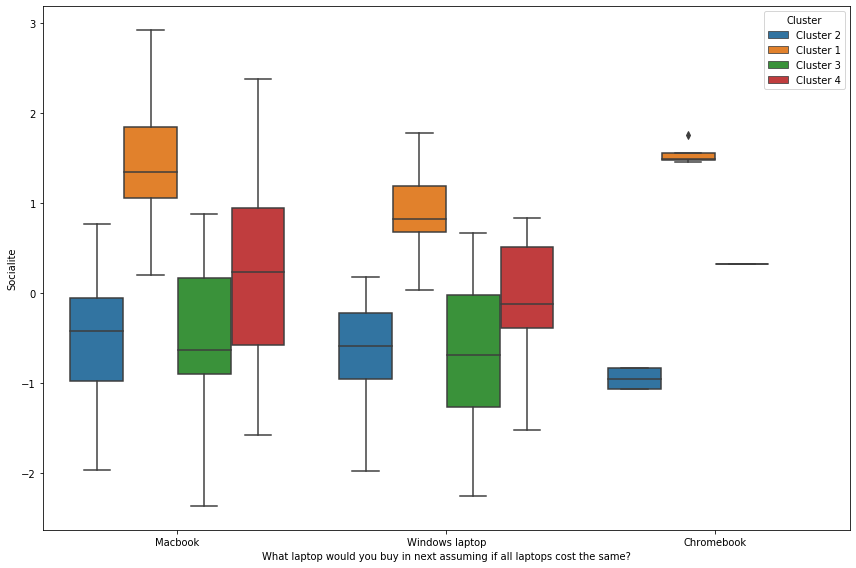

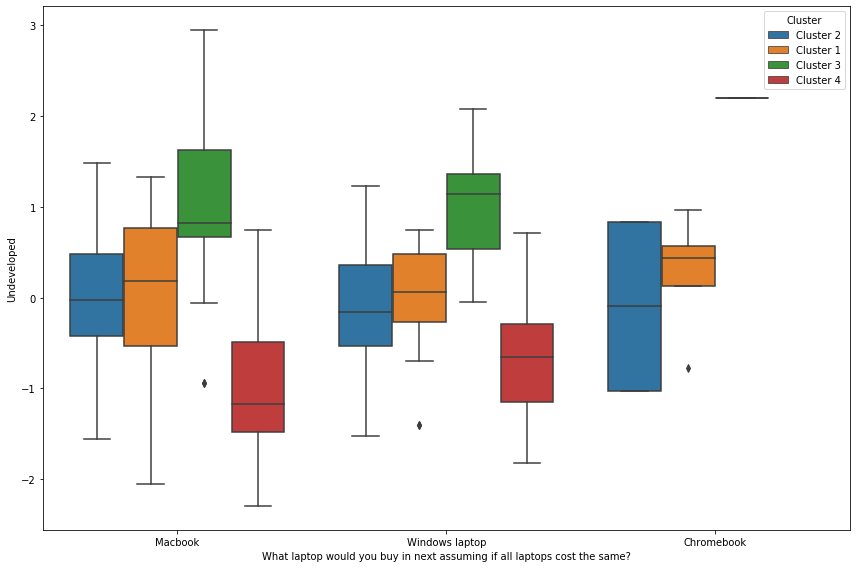

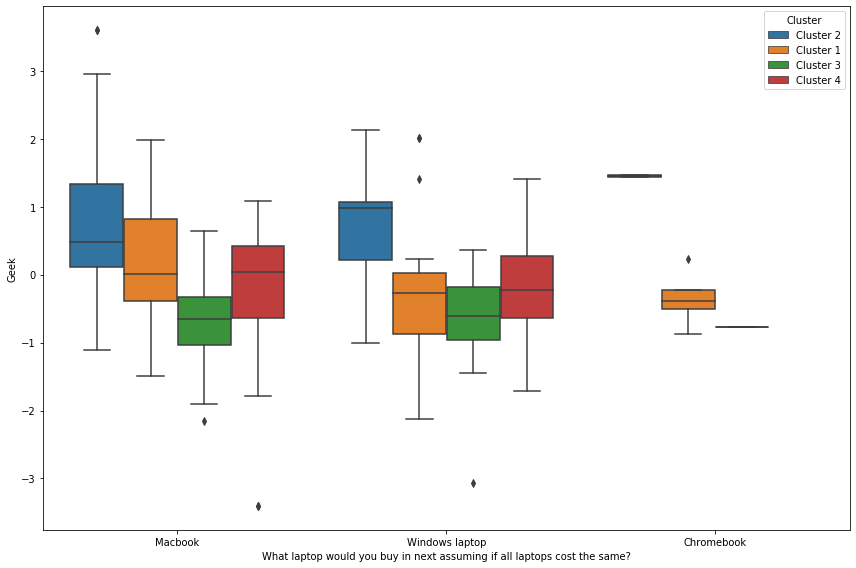

In [82]:
# Will your next purchase be a Microsoft laptop or Macbook?
# Unpleasant
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Unpleasant',
            hue = 'Cluster', 
            data = num_df)


plt.tight_layout()
plt.show()




# Socialite
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Socialite',
            hue = 'Cluster',
            data = num_df)


plt.tight_layout()
plt.show()



# Wary
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Wary',
#            hue = 'Cluster',
#            data = num_df)

#plt.tight_layout()
#plt.show()



# Undeveloped
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Undeveloped',
            hue = 'Cluster',
            data = num_df)


plt.tight_layout()
plt.show()


# Geek
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Geek',
            hue = 'Cluster',
            data = num_df)


plt.tight_layout()
plt.show()

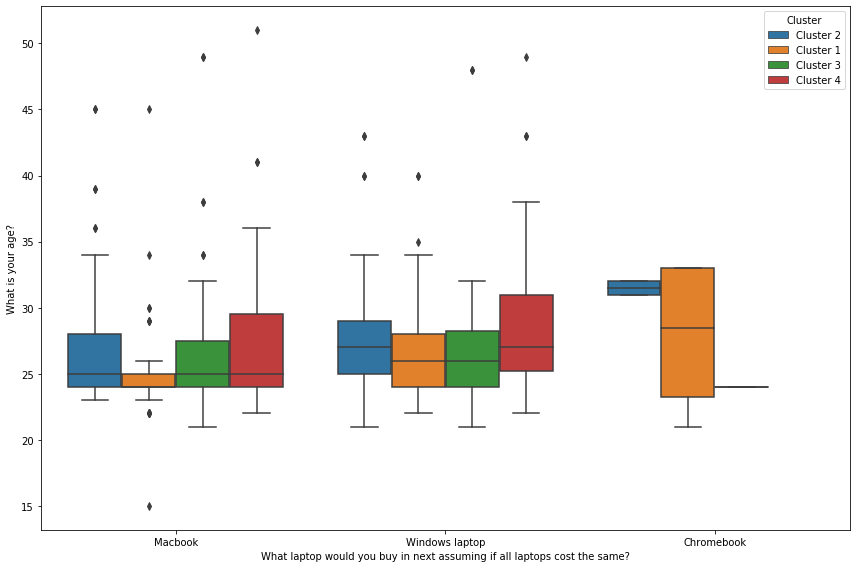

In [83]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'What is your age?',
            hue = 'Cluster',
            data = num_df)


plt.tight_layout()
plt.show()

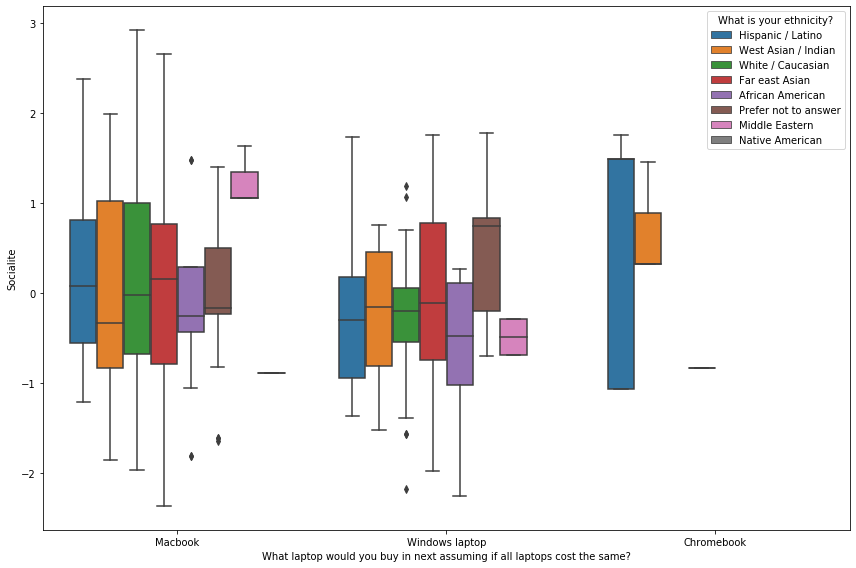

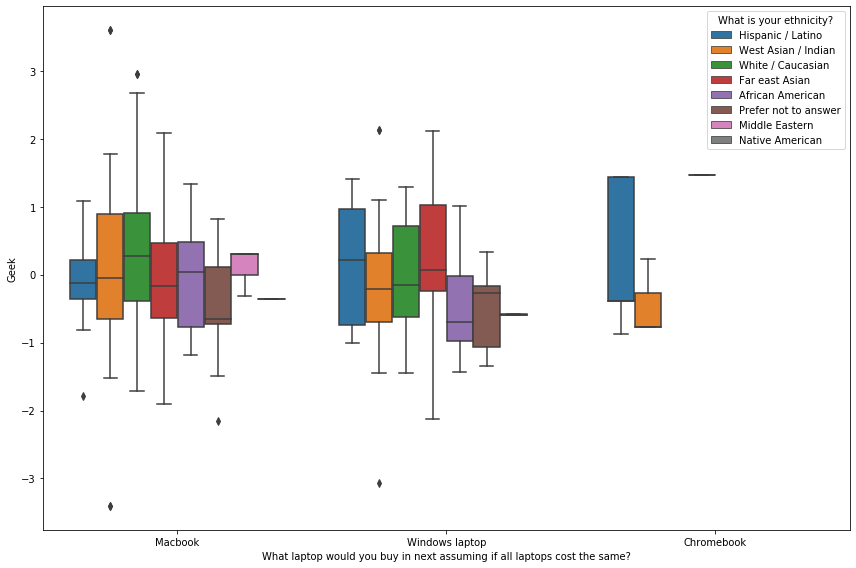

In [84]:
## Unpleasant
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Unpleasant',
#            hue = 'What is your ethnicity?', 
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()




# Socialite
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Socialite',
            hue = 'What is your ethnicity?',
            data = num_df)


plt.tight_layout()
plt.show()



## Wary
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Wary',
#            hue = 'What is your ethnicity?',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()



## Undeveloped
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Undeveloped',
#            hue = 'What is your ethnicity?',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()


# Geek
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Geek',
            hue = 'What is your ethnicity?',
            data = num_df)


plt.tight_layout()
plt.show()

# Appendix

In [85]:
# # What laptop do you currently have?
# # Unpleasant
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Unpleasant',
#             hue = 'Cluster', 
#             data = num_df)


# plt.tight_layout()
# plt.show()




# # Socialite
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Socialite',
#             hue = 'Cluster',
#             data = num_df)


# plt.tight_layout()
# plt.show()



# # Wary
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Wary',
#             hue = 'Cluster',
#             data = num_df)


# plt.tight_layout()
# plt.show()



# # Undeveloped
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Undeveloped',
#             hue = 'Cluster',
#             data = num_df)


# plt.tight_layout()
# plt.show()


# # Geek
# fig, ax = plt.subplots(figsize = (12, 8))
# sns.boxplot(x = 'What laptop do you currently have?',
#             y = 'Geek',
#             hue = 'Cluster',
#             data = num_df)


# plt.tight_layout()
# plt.show()

In [86]:
## Plots are related to Gender

## Unpleasant
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Unpleasant',
#            hue = 'Gender', 
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()
#
#
#
#
## Socialite
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Socialite',
#            hue = 'Gender',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()
#
#
#
## Wary
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Wary',
#            hue = 'Gender',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()
#
#
#
## Undeveloped
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Undeveloped',
#            hue = 'Gender',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()
#
#
## Geek
#fig, ax = plt.subplots(figsize = (12, 8))
#sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
#            y = 'Geek',
#            hue = 'Gender',
#            data = num_df)
#
#
#plt.tight_layout()
#plt.show()